In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt




# Random Forest Classification for Farming Practice Prediction

This notebook builds a Random Forest classifier to predict the most suitable farming practice based on soil properties, climate data, and geographic features.

In [5]:

df = pd.read_csv('../data_distanceFilter_best.csv') # change this to the right path to the dataset you want to train on

# Display basic information
print("Dataset shape:", df.shape)


Dataset shape: (3007, 194)


In [6]:
# Target variable
target_column = 'farming_practice'

exclude_columns = [
    'Unnamed: 0', 
    'farming_practice',  
    'results_detailed',  
    'results_actual',  
    'yield',  
    'harvest_area',  
    'production',  
    'adm_id',
    'yield_effect'

    # # Yearly rainfall (exclude individual years AND mean)
    # 'yearly_rain_6', 'yearly_rain_7', 'yearly_rain_8', 'yearly_rain_9', 'yearly_rain_10',
    # 'yearly_rain_11', 'yearly_rain_12', 'yearly_rain_13', 'yearly_rain_14', 'yearly_rain_15',
    # 'yearly_rain_16', 'yearly_rain_17', 'yearly_rain_18', 'yearly_rain_19', 'yearly_rain_20',
    # 'yearly_rain_21', 'yearly_rain_22', 'yearly_rain_23', 'yearly_rain_24',
    # 'yearly_rain_mean',  # EXCLUDE MEAN
    
    # # Yearly min temperature (exclude individual years AND mean)
    # 'yearly_min_temp_6', 'yearly_min_temp_7', 'yearly_min_temp_8', 'yearly_min_temp_9', 'yearly_min_temp_10',
    # 'yearly_min_temp_11', 'yearly_min_temp_12', 'yearly_min_temp_13', 'yearly_min_temp_14', 'yearly_min_temp_15',
    # 'yearly_min_temp_16', 'yearly_min_temp_17', 'yearly_min_temp_18', 'yearly_min_temp_19', 'yearly_min_temp_20',
    # 'yearly_min_temp_21', 'yearly_min_temp_22', 'yearly_min_temp_23', 'yearly_min_temp_24',
    # 'yearly_min_temp_mean',  # EXCLUDE MEAN
    
    # # Yearly avg min temperature (exclude individual years AND mean)
    # 'yearly_avg_min_temp_6', 'yearly_avg_min_temp_7', 'yearly_avg_min_temp_8', 'yearly_avg_min_temp_9', 'yearly_avg_min_temp_10',
    # 'yearly_avg_min_temp_11', 'yearly_avg_min_temp_12', 'yearly_avg_min_temp_13', 'yearly_avg_min_temp_14', 'yearly_avg_min_temp_15',
    # 'yearly_avg_min_temp_16', 'yearly_avg_min_temp_17', 'yearly_avg_min_temp_18', 'yearly_avg_min_temp_19', 'yearly_avg_min_temp_20',
    # 'yearly_avg_min_temp_21', 'yearly_avg_min_temp_22', 'yearly_avg_min_temp_23', 'yearly_avg_min_temp_24',
    # 'yearly_avg_min_temp_mean',  # EXCLUDE MEAN
    
    # # Yearly max temperature (exclude individual years AND mean)
    # 'yearly_max_temp_6', 'yearly_max_temp_7', 'yearly_max_temp_8', 'yearly_max_temp_9', 'yearly_max_temp_10',
    # 'yearly_max_temp_11', 'yearly_max_temp_12', 'yearly_max_temp_13', 'yearly_max_temp_14', 'yearly_max_temp_15',
    # 'yearly_max_temp_16', 'yearly_max_temp_17', 'yearly_max_temp_18', 'yearly_max_temp_19', 'yearly_max_temp_20',
    # 'yearly_max_temp_21', 'yearly_max_temp_22', 'yearly_max_temp_23', 'yearly_max_temp_24',
    # 'yearly_max_temp_mean',  # EXCLUDE MEAN
    
    # # Yearly avg max temperature (exclude individual years AND mean)
    # 'yearly_avg_max_temp_6', 'yearly_avg_max_temp_7', 'yearly_avg_max_temp_8', 'yearly_avg_max_temp_9', 'yearly_avg_max_temp_10',
    # 'yearly_avg_max_temp_11', 'yearly_avg_max_temp_12', 'yearly_avg_max_temp_13', 'yearly_avg_max_temp_14', 'yearly_avg_max_temp_15',
    # 'yearly_avg_max_temp_16', 'yearly_avg_max_temp_17', 'yearly_avg_max_temp_18', 'yearly_avg_max_temp_19', 'yearly_avg_max_temp_20',
    # 'yearly_avg_max_temp_21', 'yearly_avg_max_temp_22', 'yearly_avg_max_temp_23', 'yearly_avg_max_temp_24',
    # 'yearly_avg_max_temp_mean',  # EXCLUDE MEAN
    
    # # Yearly avg mean temperature (exclude individual years AND mean)
    # 'yearly_avg_mean_temp_6', 'yearly_avg_mean_temp_7', 'yearly_avg_mean_temp_8', 'yearly_avg_mean_temp_9', 'yearly_avg_mean_temp_10',
    # 'yearly_avg_mean_temp_11', 'yearly_avg_mean_temp_12', 'yearly_avg_mean_temp_13', 'yearly_avg_mean_temp_14', 'yearly_avg_mean_temp_15',
    # 'yearly_avg_mean_temp_16', 'yearly_avg_mean_temp_17', 'yearly_avg_mean_temp_18', 'yearly_avg_mean_temp_19', 'yearly_avg_mean_temp_20',
    # 'yearly_avg_mean_temp_21', 'yearly_avg_mean_temp_22', 'yearly_avg_mean_temp_23', 'yearly_avg_mean_temp_24',
    # 'yearly_avg_mean_temp_mean',
    #  'lat', 'lon' # EXCLUDE MEAN
]

# Get feature columns
feature_columns = [col for col in df.columns if col not in exclude_columns]

print("Target variable:", target_column)
print(f"\nExcluded {len(exclude_columns)} columns")
print(f"Number of feature columns: {len(feature_columns)}")
print("\nRemaining features (soil properties + coordinates):")
for col in sorted(feature_columns):
    print(f"  - {col}")


Target variable: farming_practice

Excluded 9 columns
Number of feature columns: 185

Remaining features (soil properties + coordinates):
  - MostProbable
  - bdod_0-5cm_mean
  - bdod_100-200cm_mean
  - bdod_15-30cm_mean
  - bdod_30-60cm_mean
  - bdod_5-15cm_mean
  - bdod_60-100cm_mean
  - cec_0-5cm_mean
  - cec_100-200cm_mean
  - cec_15-30cm_mean
  - cec_30-60cm_mean
  - cec_5-15cm_mean
  - cec_60-100cm_mean
  - cfvo_0-5cm_mean
  - cfvo_100-200cm_mean
  - cfvo_15-30cm_mean
  - cfvo_30-60cm_mean
  - cfvo_5-15cm_mean
  - cfvo_60-100cm_mean
  - clay_0-5cm_mean
  - clay_100-200cm_mean
  - clay_15-30cm_mean
  - clay_30-60cm_mean
  - clay_5-15cm_mean
  - clay_60-100cm_mean
  - lat
  - lon
  - nearest_distance_km
  - nitrogen_0-5cm_mean
  - nitrogen_100-200cm_mean
  - nitrogen_15-30cm_mean
  - nitrogen_30-60cm_mean
  - nitrogen_5-15cm_mean
  - nitrogen_60-100cm_mean
  - ocd_0-5cm_mean
  - ocd_100-200cm_mean
  - ocd_15-30cm_mean
  - ocd_30-60cm_mean
  - ocd_5-15cm_mean
  - ocd_60-100cm_mean
 

Farming practice distribution:
farming_practice
Soil Mulching (<13 Celcious)             2090
Film-mulching drip irrigation (Spain)     315
Soil Mulching (>13 Celcious)              274
aerated irrigation (AI) (ph <7)           261
Soil Mulching (Clay soil)                  45
Soil Mulching (Yearly rainfall <400)       21
biochar amendment (lat <35)                 1
Name: count, dtype: int64

Number of unique farming practices: 7


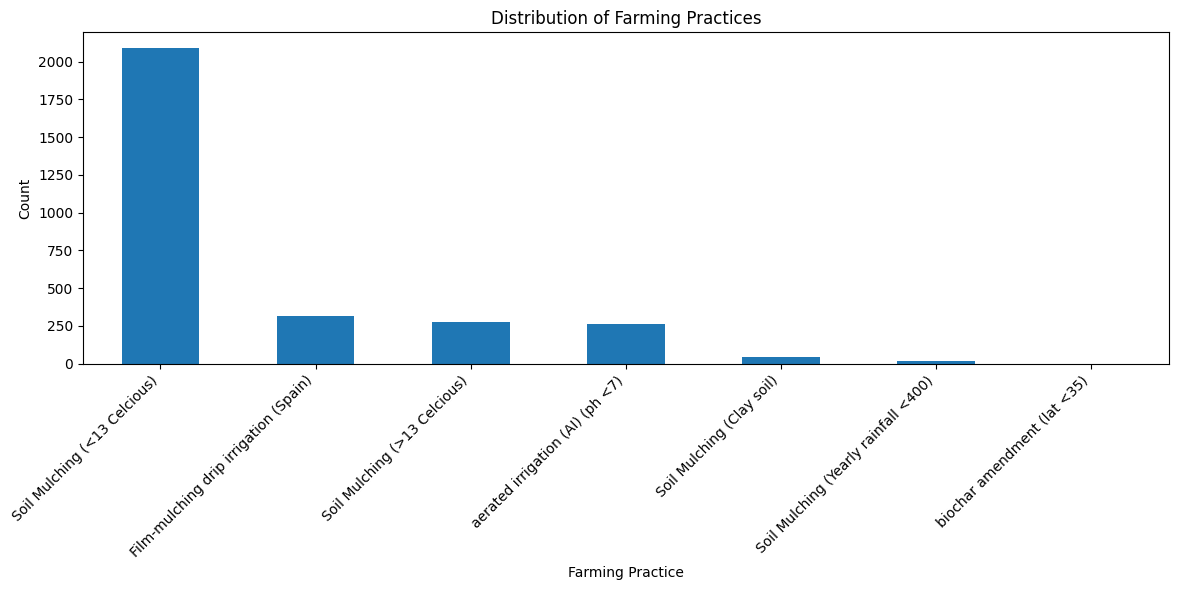

In [7]:
# Check distribution of farming practices
print("Farming practice distribution:")
print(df[target_column].value_counts())
print("\nNumber of unique farming practices:", df[target_column].nunique())

# Visualize distribution
plt.figure(figsize=(12, 6))
df[target_column].value_counts().plot(kind='bar')
plt.title('Distribution of Farming Practices')
plt.xlabel('Farming Practice')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Class Distribution

The bar chart above shows how farming practices are distributed in the dataset. Notice the **class imbalance** - some practices have many more samples than others. This is important because:
- The model might be biased toward the majority class
- We use `class_weight='balanced'` later to address this

In [8]:
# Separate features and target
X = df[feature_columns].copy()
y = df[target_column].copy()


# Fill missing values(if any) with median for numeric columns
if X.isnull().sum().sum() > 0:
    X = X.fillna(X.median())

print("\nFeatures shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (3007, 185)
Target shape: (3007,)


In [9]:

# Filter out biochar amendment
mask = y != 'biochar amendment (lat <35)'
X = X[mask]
y = y[mask]

# Split the data - 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y  # Maintain class distribution in splits
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nTraining set farming practice distribution:")
print(y_train.value_counts())
print("\nTest set farming practice distribution:")
print(y_test.value_counts())

Training set size: 2404
Test set size: 602

Training set farming practice distribution:
farming_practice
Soil Mulching (<13 Celcious)             1671
Film-mulching drip irrigation (Spain)     252
Soil Mulching (>13 Celcious)              219
aerated irrigation (AI) (ph <7)           209
Soil Mulching (Clay soil)                  36
Soil Mulching (Yearly rainfall <400)       17
Name: count, dtype: int64

Test set farming practice distribution:
farming_practice
Soil Mulching (<13 Celcious)             419
Film-mulching drip irrigation (Spain)     63
Soil Mulching (>13 Celcious)              55
aerated irrigation (AI) (ph <7)           52
Soil Mulching (Clay soil)                  9
Soil Mulching (Yearly rainfall <400)       4
Name: count, dtype: int64


### Train/Test Split

The data is split 80/20 using **stratified sampling** (`stratify=y`), which ensures both train and test sets have the same proportion of each farming practice. This prevents the test set from accidentally having too few samples of minority classes.

In [10]:
rf_model = RandomForestClassifier(
    n_estimators=100,     
    max_depth=15,              # REGULARIZATION: Limit tree depth to prevent overfitting
    min_samples_split=10,      # REGULARIZATION: Require more samples to split nodes
    min_samples_leaf=5,        # REGULARIZATION: Require more samples at leaf nodes
    max_features='sqrt',       # REGULARIZATION: Use sqrt(n_features) for each split
    random_state=42,           # For reproducibility
    class_weight='balanced',   # Handle class imbalance
    n_jobs=-1             
)

print("Training Random Forest model with regularization...")
print(f"Parameters: max_depth={rf_model.max_depth}, min_samples_split={rf_model.min_samples_split}, min_samples_leaf={rf_model.min_samples_leaf}")
rf_model.fit(X_train, y_train)
print("Model training completed")

Training Random Forest model with regularization...
Parameters: max_depth=15, min_samples_split=10, min_samples_leaf=5
Model training completed


### Model Training with Regularization

The Random Forest uses several **regularization parameters** to prevent overfitting:

| Parameter | Value | Purpose |
|-----------|-------|---------|
| `max_depth=15` | Limits tree depth | Prevents trees from memorizing training data |
| `min_samples_split=10` | Min samples to split a node | Stops splitting when too few samples remain |
| `min_samples_leaf=5` | Min samples at leaf nodes | Ensures predictions are based on multiple samples |
| `max_features='sqrt'` | Features per split | Adds randomness, reduces correlation between trees |
| `class_weight='balanced'` | Auto-adjust weights | Gives minority classes more importance |

In [11]:
# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Training Accuracy:", round(train_accuracy, 4))
print("Test Accuracy:", round(test_accuracy, 4))

# Classification report
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.9967
Test Accuracy: 0.9784

Classification Report (Test Set):
                                       precision    recall  f1-score   support

Film-mulching drip irrigation (Spain)       0.98      0.89      0.93        63
         Soil Mulching (<13 Celcious)       0.98      1.00      0.99       419
         Soil Mulching (>13 Celcious)       0.98      0.96      0.97        55
            Soil Mulching (Clay soil)       0.90      1.00      0.95         9
 Soil Mulching (Yearly rainfall <400)       1.00      0.50      0.67         4
      aerated irrigation (AI) (ph <7)       0.95      1.00      0.97        52

                             accuracy                           0.98       602
                            macro avg       0.97      0.89      0.91       602
                         weighted avg       0.98      0.98      0.98       602



Top 20 Most Important Features:
                     feature  importance
122         phh2o_0-5cm_mean    0.039326
0                        lon    0.037387
140          clay_0-5cm_mean    0.030971
124       phh2o_15-30cm_mean    0.021733
123        phh2o_5-15cm_mean    0.021553
141         clay_5-15cm_mean    0.020892
142        clay_15-30cm_mean    0.020831
126      phh2o_60-100cm_mean    0.020448
143        clay_30-60cm_mean    0.020337
12            yearly_rain_16    0.019992
21          yearly_rain_mean    0.019297
125       phh2o_30-60cm_mean    0.017862
113  yearly_avg_mean_temp_17    0.017043
20            yearly_rain_24    0.015982
11            yearly_rain_15    0.015830
144       clay_60-100cm_mean    0.015732
145      clay_100-200cm_mean    0.014476
34        yearly_min_temp_18    0.013777
82     yearly_avg_max_temp_6    0.013678
45     yearly_avg_min_temp_9    0.012927


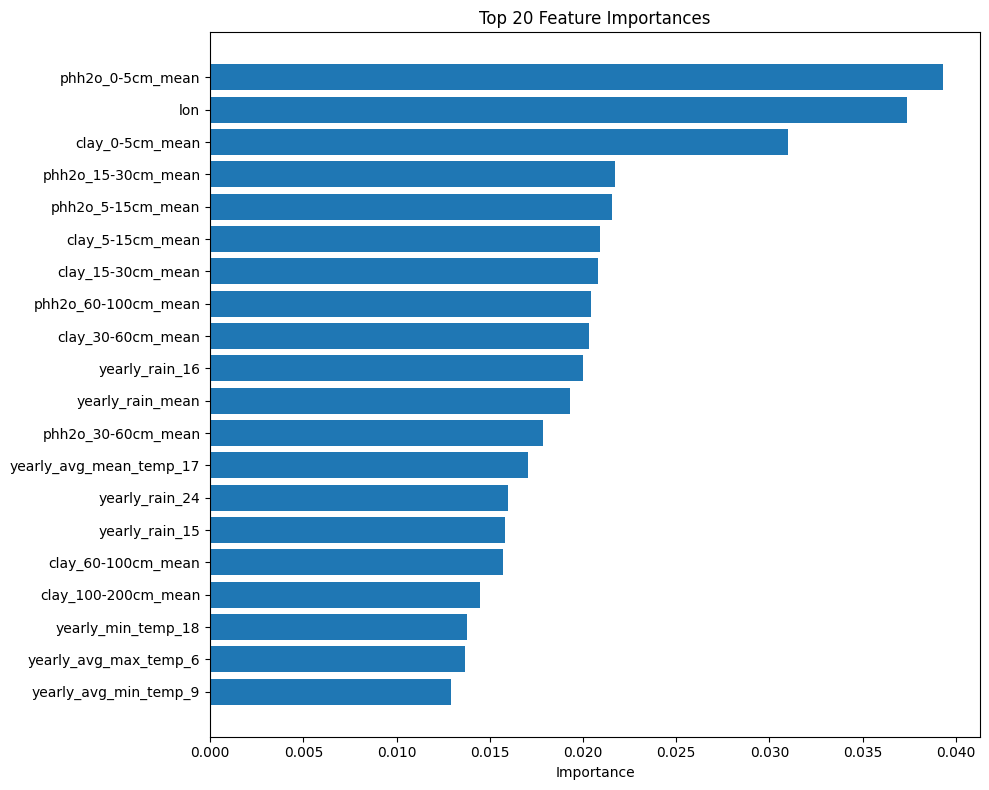

In [12]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# Display top 20 features
print("Top 20 Most Important Features:")
print(feature_importance.head(20))

# Visualize top 20 features
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Feature Importance

Random Forest can tell us which features matter most for predictions. Higher importance means the feature is more useful for distinguishing between farming practices. This helps us:
- Understand what drives the predictions
- Potentially reduce the model to fewer, more important features

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Perform 5-fold cross-validation on the training data
print("="*80)
print("CROSS-VALIDATION EVALUATION")
print("="*80)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a fresh model with same parameters for CV
rf_cv = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)

# Calculate cross-validation scores
cv_scores = cross_val_score(rf_cv, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"\nThis gives us a more reliable estimate of model performance.")
print(f"Compare this to test accuracy: {test_accuracy:.4f}")

print(f"\nOverfitting check:")
print(f"  Training Accuracy: {train_accuracy:.4f}")
print(f"  CV Mean Accuracy:  {cv_scores.mean():.4f}")
print(f"  Test Accuracy:     {test_accuracy:.4f}")

gap = train_accuracy - cv_scores.mean()
print(f"  Gap: {gap:.4f}")

CROSS-VALIDATION EVALUATION
Cross-Validation Accuracy Scores: [0.97089397 0.96881497 0.97089397 0.97505198 0.97083333]
Mean CV Accuracy: 0.9713 (+/- 0.0041)

This gives us a more reliable estimate of model performance.
Compare this to test accuracy: 0.9784

Overfitting check:
  Training Accuracy: 0.9967
  CV Mean Accuracy:  0.9713
  Test Accuracy:     0.9784
  Gap: 0.0254


### Cross-Validation

A single train/test split might give misleading results if we got "lucky" with the split. **5-fold cross-validation** provides a more reliable estimate by:
1. Splitting the training data into 5 parts
2. Training on 4 parts, testing on 1 part
3. Repeating 5 times (each part gets to be the test set once)
4. Averaging the results

The `+/-` value shows how consistent the model performs across different splits.

### Feature Selection: Finding the Optimal Number of Features

Using all 185 features might include noise that hurts performance. This section tests the model with different numbers of features (keeping only the most important ones) to find the sweet spot where:
- We use fewer features (simpler, faster model)
- Performance remains high or even improves

The goal is to find the minimum number of features that maintains good accuracy.

FEATURE IMPORTANCE RANKING
Total features: 185

Top 20 most important features:
                feature  importance
       phh2o_0-5cm_mean    0.039326
                    lon    0.037387
        clay_0-5cm_mean    0.030971
     phh2o_15-30cm_mean    0.021733
      phh2o_5-15cm_mean    0.021553
       clay_5-15cm_mean    0.020892
      clay_15-30cm_mean    0.020831
    phh2o_60-100cm_mean    0.020448
      clay_30-60cm_mean    0.020337
         yearly_rain_16    0.019992
       yearly_rain_mean    0.019297
     phh2o_30-60cm_mean    0.017862
yearly_avg_mean_temp_17    0.017043
         yearly_rain_24    0.015982
         yearly_rain_15    0.015830
     clay_60-100cm_mean    0.015732
    clay_100-200cm_mean    0.014476
     yearly_min_temp_18    0.013777
  yearly_avg_max_temp_6    0.013678
  yearly_avg_min_temp_9    0.012927

TESTING DIFFERENT FEATURE SUBSET SIZES
Will test with: [185, 100, 75, 50, 40, 30, 20, 15, 10, 5] features

Features: 185 | Train: 0.9963 | Test: 0.9751 | Gap: 0.02

C:\Users\artur\AppData\Local\Temp\ipykernel_30940\1125897525.py:153: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


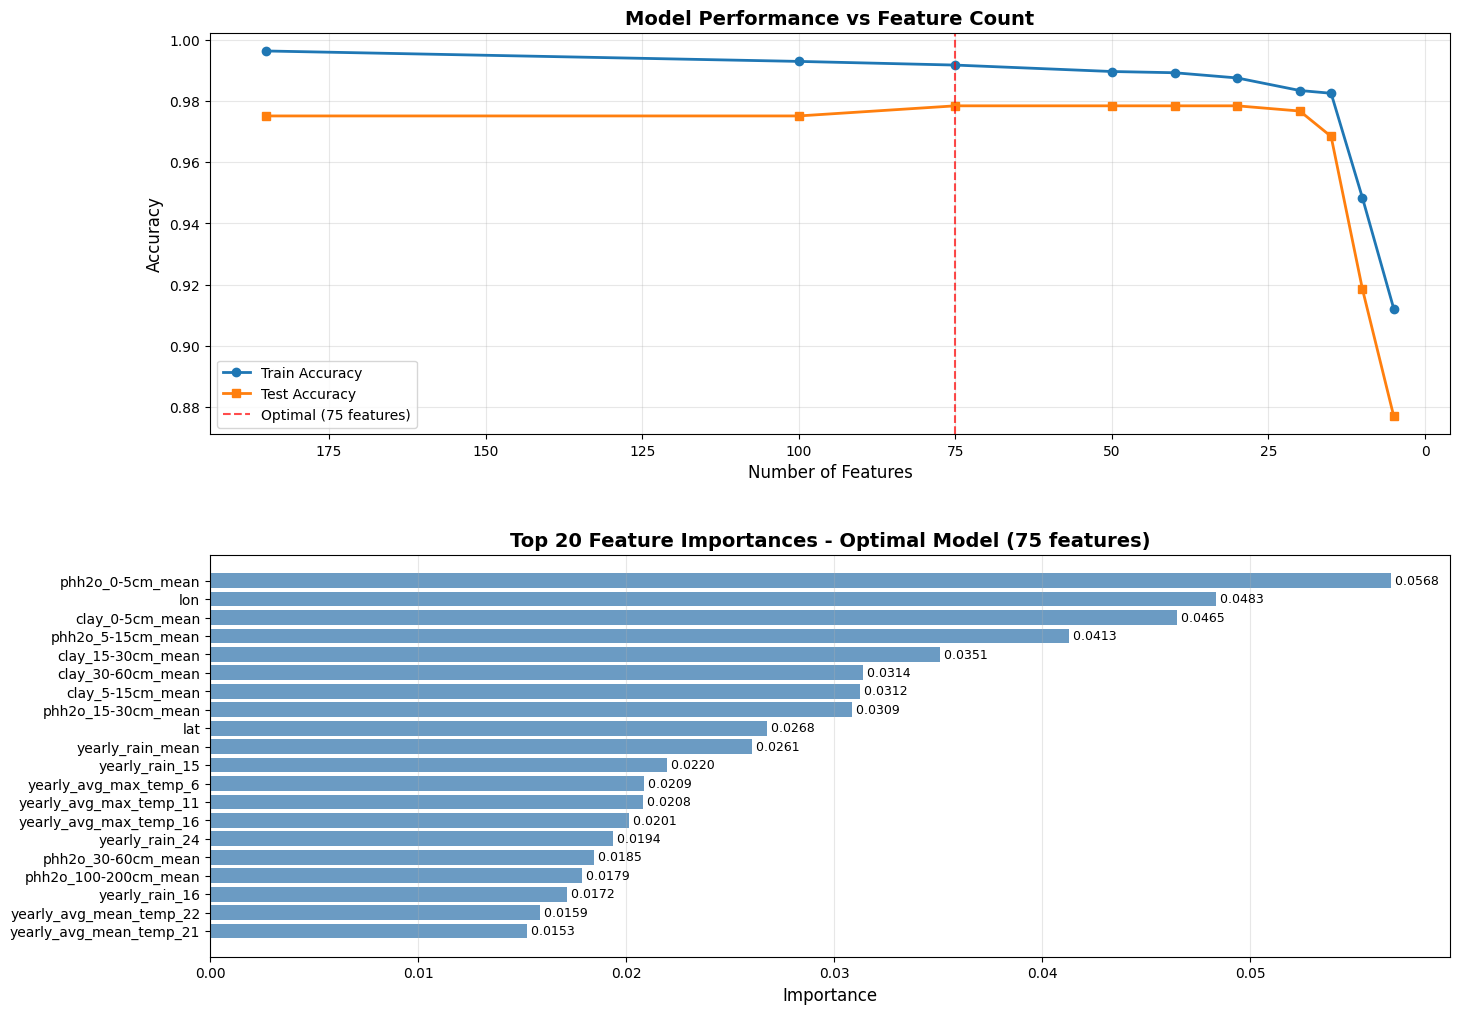


CLASSIFICATION REPORT - OPTIMAL MODEL (75 features)
                                       precision    recall  f1-score   support

Film-mulching drip irrigation (Spain)       1.00      0.87      0.93        63
         Soil Mulching (<13 Celcious)       0.99      1.00      0.99       419
         Soil Mulching (>13 Celcious)       0.95      0.98      0.96        55
            Soil Mulching (Clay soil)       0.82      1.00      0.90         9
 Soil Mulching (Yearly rainfall <400)       1.00      0.75      0.86         4
      aerated irrigation (AI) (ph <7)       0.91      0.98      0.94        52

                             accuracy                           0.98       602
                            macro avg       0.94      0.93      0.93       602
                         weighted avg       0.98      0.98      0.98       602


OPTIMAL FEATURE SET (75 features)
 1. phh2o_0-5cm_mean                         (importance: 0.0568)
 2. lon                                      (importa

In [15]:
# ============================================================================
# ITERATIVE FEATURE SELECTION BASED ON IMPORTANCE
# ============================================================================

# Get feature importance from the trained model
feature_importance_df = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("="*80)
print("FEATURE IMPORTANCE RANKING")
print("="*80)
print(f"Total features: {len(feature_columns)}\n")
print("Top 20 most important features:")
print(feature_importance_df.head(20).to_string(index=False))

# Test different numbers of features
n_total_features = len(feature_columns)

# Create a range of feature counts to test
if n_total_features > 100:
    # If many features, test more aggressively
    feature_counts = [n_total_features, 100, 75, 50, 40, 30, 20, 15, 10, 5]
elif n_total_features > 50:
    feature_counts = [n_total_features, 50, 40, 30, 20, 15, 10, 5]
else:
    # For fewer features
    feature_counts = [n_total_features, 40, 30, 20, 15, 10, 5]

# Remove counts that exceed total features
feature_counts = [n for n in feature_counts if n <= n_total_features]

print(f"\n{'='*80}")
print("TESTING DIFFERENT FEATURE SUBSET SIZES")
print("="*80)
print(f"Will test with: {feature_counts} features\n")

results = []
for n_features in feature_counts:
    # Get top N features
    top_features = feature_importance_df.head(n_features)['feature'].tolist()
    
    # Train model with regularization on selected features
    rf_temp = RandomForestClassifier(
        n_estimators=100,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        random_state=42,
        class_weight='balanced',
        n_jobs=-1
    )
    rf_temp.fit(X_train[top_features], y_train)
    
    # Evaluate
    train_acc = accuracy_score(y_train, rf_temp.predict(X_train[top_features]))
    test_acc = accuracy_score(y_test, rf_temp.predict(X_test[top_features]))
    
    # Store results
    results.append({
        'n_features': n_features,
        'train_acc': round(train_acc, 4),
        'test_acc': round(test_acc, 4),
        'overfitting_gap': round(train_acc - test_acc, 4),
        'top_5_features': ', '.join(top_features[:5])
    })
    
    print(f"Features: {n_features:3d} | Train: {train_acc:.4f} | Test: {test_acc:.4f} | Gap: {train_acc - test_acc:.4f}")

# Create results dataframe
results_df = pd.DataFrame(results)

print(f"\n{'='*80}")
print("FEATURE SELECTION RESULTS SUMMARY")
print("="*80)
print(results_df.to_string(index=False))

# Find optimal number of features (best test accuracy)
best_idx = results_df['test_acc'].idxmax()
best_result = results_df.iloc[best_idx]

print(f"\n{'='*80}")
print("RECOMMENDATION")
print("="*80)
print(f"Best test accuracy: {best_result['test_acc']} with {best_result['n_features']} features")
print(f"Overfitting gap: {best_result['overfitting_gap']}")
print(f"\nTop 5 features at this level: {best_result['top_5_features']}")

# Train final model with optimal features
optimal_features = feature_importance_df.head(int(best_result['n_features']))['feature'].tolist()
rf_optimal = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42,
    class_weight='balanced',
    n_jobs=-1
)
rf_optimal.fit(X_train[optimal_features], y_train)
y_pred_optimal = rf_optimal.predict(X_test[optimal_features])

# Get feature importance from optimal model
optimal_feature_importance = pd.DataFrame({
    'feature': optimal_features,
    'importance': rf_optimal.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n{'='*80}")
print(f"FEATURE IMPORTANCE - OPTIMAL MODEL ({len(optimal_features)} features)")
print("="*80)
print(optimal_feature_importance.to_string(index=False))

# Visualize results
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 1, hspace=0.3)

# Plot 1: Accuracy vs Number of Features
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(results_df['n_features'], results_df['train_acc'], marker='o', label='Train Accuracy', linewidth=2)
ax1.plot(results_df['n_features'], results_df['test_acc'], marker='s', label='Test Accuracy', linewidth=2)
ax1.axvline(x=best_result['n_features'], color='red', linestyle='--', alpha=0.7, label=f"Optimal ({best_result['n_features']} features)")
ax1.set_xlabel('Number of Features', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Performance vs Feature Count', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.invert_xaxis()  # More features on left, fewer on right

# Plot 2: Feature Importance for Optimal Model (Top 20)
ax2 = fig.add_subplot(gs[1, 0])
top_n_display = min(20, len(optimal_feature_importance))
top_features_to_plot = optimal_feature_importance.head(top_n_display)

# Create horizontal bar chart
y_pos = np.arange(len(top_features_to_plot))
ax2.barh(y_pos, top_features_to_plot['importance'], color='steelblue', alpha=0.8)
ax2.set_yticks(y_pos)
ax2.set_yticklabels(top_features_to_plot['feature'], fontsize=10)
ax2.invert_yaxis()  # Highest importance at top
ax2.set_xlabel('Importance', fontsize=12)
ax2.set_title(f'Top {top_n_display} Feature Importances - Optimal Model ({int(best_result["n_features"])} features)', 
             fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

# Add percentage labels on bars
for i, v in enumerate(top_features_to_plot['importance']):
    ax2.text(v, i, f' {v:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Detailed classification report for optimal model
print(f"\n{'='*80}")
print(f"CLASSIFICATION REPORT - OPTIMAL MODEL ({int(best_result['n_features'])} features)")
print("="*80)
print(classification_report(y_test, y_pred_optimal, zero_division=0))

# Show selected features at optimal level
print(f"\n{'='*80}")
print(f"OPTIMAL FEATURE SET ({len(optimal_features)} features)")
print("="*80)
for i, feat in enumerate(optimal_features, 1):
    importance = optimal_feature_importance[optimal_feature_importance['feature'] == feat]['importance'].values[0]
    print(f"{i:2d}. {feat:40s} (importance: {importance:.4f})")